In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.preprocessing import FunctionTransformer

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
%matplotlib inline

In [2]:
# read in the data
df = pd.read_json('/Users/laurenwashington/Documents/Problem3Data.json')
df.head()

,Manufacturer,currentVehicleDealTerms,currentVehiclePaymentsRemaining,currentVehicleVin,customerNumber,dealerId,hasSale,month,rank,soldVehicleVin
0,1,36,17,-4077503237721614488,-1,0,0,2015-11-01T04:00:00,30,NaN
1,1,36,16,-4077503237721614488,-1,0,0,2015-12-01T05:00:00,31,NaN
2,1,36,15,-4077503237721614488,-1,0,0,2016-01-01T05:00:00,32,NaN
3,1,36,14,-4077503237721614488,-1,0,0,2016-02-01T05:00:00,34,NaN
4,1,36,13,-4077503237721614488,-1,0,0,2016-03-01T05:00:00,37,NaN


In [11]:
df.customerNumber.describe()

count     451417
unique     73458
top       215599
freq         126
Name: customerNumber, dtype: object

In [3]:
df = df.drop_duplicates('customerNumber')

In [59]:
df.describe()

,Manufacturer,currentVehicleDealTerms,currentVehiclePaymentsRemaining,currentVehicleVin,dealerId,hasSale,lead_score,soldVehicleVin
count,73458.000000,73458.000000,73458.000000,7.345800e+04,73458.000000,73458.000000,73458.000000,1.054000e+03
mean,2.326091,35.732895,19.559422,7.622538e+16,16.253002,0.014348,37.374214,-4.071288e+17
std,0.746628,4.073478,10.756392,5.323094e+18,8.082092,0.118923,25.147461,5.339100e+18
min,1.000000,5.000000,-17.000000,-9.223209e+18,0.000000,0.000000,2.000000,-9.219413e+18
25%,2.000000,36.000000,10.000000,-4.527906e+18,11.000000,0.000000,17.000000,-5.352220e+18
50%,2.000000,36.000000,20.000000,1.656741e+17,18.000000,0.000000,30.000000,-8.958900e+17
75%,3.000000,36.000000,29.000000,4.687855e+18,21.000000,0.000000,52.000000,4.402058e+18
max,3.000000,60.000000,59.000000,9.222762e+18,29.000000,1.000000,100.000000,9.212305e+18


In [13]:
df.customerNumber.describe()

count     73458
unique    73458
top       46129
freq          1
Name: customerNumber, dtype: object

In [14]:
df.dealerId[df.hasSale == 1].value_counts()

11    174
28    124
19     74
20     69
3      69
29     66
18     62
15     55
21     51
25     37
26     37
2      36
12     30
24     20
16     18
17     17
1      17
27     16
4      16
0      15
22     14
9      14
23     12
13      4
14      3
8       2
6       1
5       1
Name: dealerId, dtype: int64

In [19]:
#dealer_hasSale = df.dealerId[df.hasSale == 1].value_counts()
dealer_hasSale.count()

28

In [23]:
dealer_hasSale.describe()

count     28.000000
mean      37.642857
std       39.600051
min        1.000000
25%       14.000000
50%       19.000000
75%       56.750000
max      174.000000
Name: dealerId, dtype: float64

In [17]:
np.percentile(dealer_hasSale, 95)

106.49999999999993

In [18]:
#mean plus std dev
c = 38 + 40
print c

78


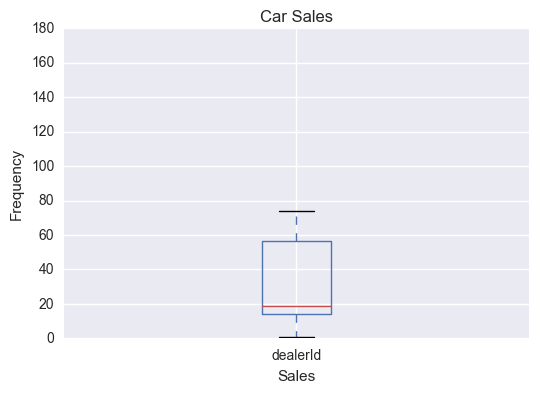

In [26]:
df.dealerId[df.hasSale == 1].value_counts().plot(kind = 'box', title ='Car Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

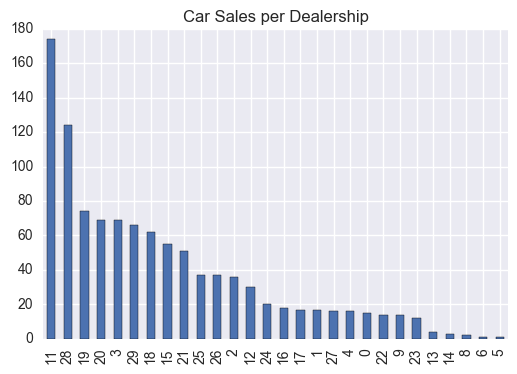

In [28]:
df.dealerId[df.hasSale == 1].value_counts().plot(kind = 'bar', title = 'Car Sales per Dealership')
plt.xlabel = ('Dealership Identification Number')
plt.ylabel = ('Frequency')

In [4]:
df = df.rename(columns={'rank': 'lead_score'})

In [61]:
df.lead_score.describe()

count    73458.000000
mean        37.374214
std         25.147461
min          2.000000
25%         17.000000
50%         30.000000
75%         52.000000
max        100.000000
Name: lead_score, dtype: float64

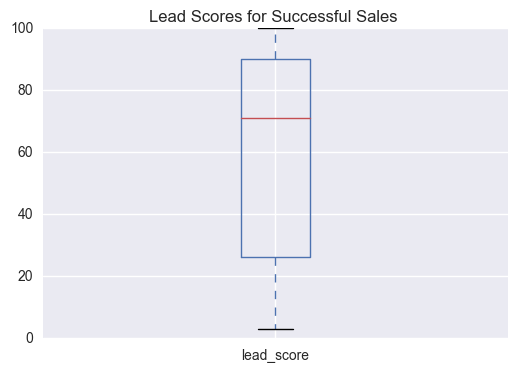

In [62]:
df.lead_score[df.hasSale == 1].plot(kind = 'box', title ='Lead Scores for Successful Sales ')

In [31]:
df[df.hasSale == 1].mode()

,Manufacturer,currentVehicleDealTerms,currentVehiclePaymentsRemaining,currentVehicleVin,customerNumber,dealerId,hasSale,month,rank,soldVehicleVin
0,2,36,3,NaN,NaN,11,1,2015-11-01T04:00:00,100,-7.284978e+18


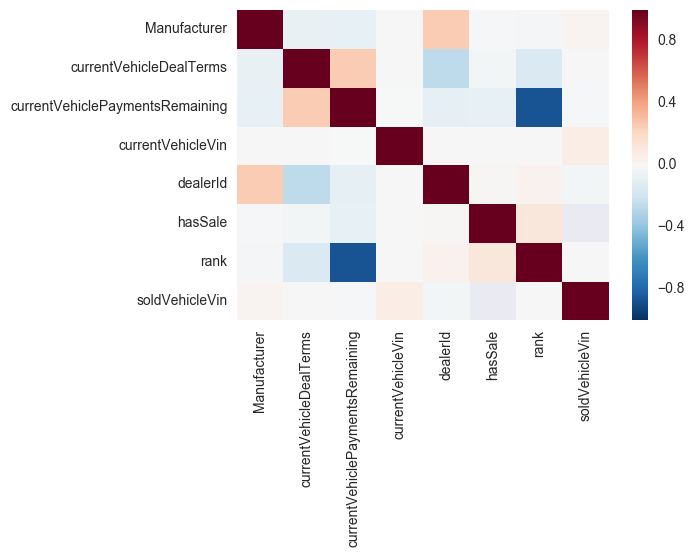

In [32]:
sns.heatmap(df.corr())

In [33]:
df.Manufacturer.value_counts()

3    36357
2    24698
1    12403
Name: Manufacturer, dtype: int64

In [45]:
df.Manufacturer[df.hasSale == 1].value_counts()

2    446
3    437
1    171
Name: Manufacturer, dtype: int64

In [17]:
# define X and y
feature_cols = ['Manufacturer','currentVehicleDealTerms' ,'currentVehiclePaymentsRemaining']
X = df[feature_cols]
y = df.lead_score

In [18]:
# instantiate a DecisionTreeRegressor (with random_state=1)
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [19]:
# use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

9.5940767149759996

In [29]:
# list of values to try
max_depth_range = range(1, 15)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

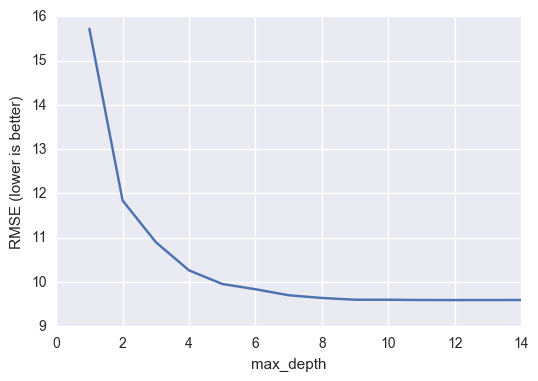

In [30]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [35]:
# try different values one-by-one
treereg = DecisionTreeRegressor(max_depth=12, random_state=1)
scores = cross_val_score(treereg, X, y, cv=14, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

9.5928301765445472

In [37]:
# max_depth=3 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=12, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=12, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [38]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,Manufacturer,0.023456
1,currentVehicleDealTerms,0.014070
2,currentVehiclePaymentsRemaining,0.962474


In [40]:
# max_depth=3 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth= 12 ,random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=12, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [42]:
# create a Graphviz file
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='sales_rank.dot', feature_names=feature_cols)

In [144]:
# null accuracy
#y.value_counts(normalize=True)

In [45]:
# use fitted model to make predictions on testing data
X_test = df[feature_cols]
y_test = df.lead_score
y_pred = treereg.predict(X_test)
y_pred

array([ 35.52898551,  79.7483871 ,  54.37748344, ...,  85.76785714,
        57.58053691,  57.58053691])

In [46]:
# calculate RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

9.3536906853083348